# Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report 
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r"C:/Users/Rahul Nagarajan/Desktop/ML/Credit Card/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
df["Class"].unique()

array([0, 1], dtype=int64)

# Dataset visualization

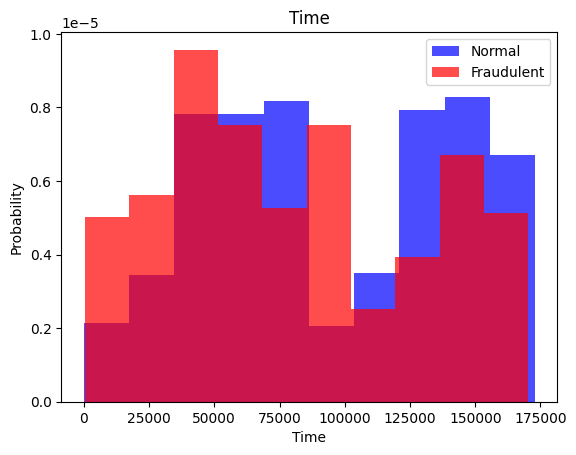

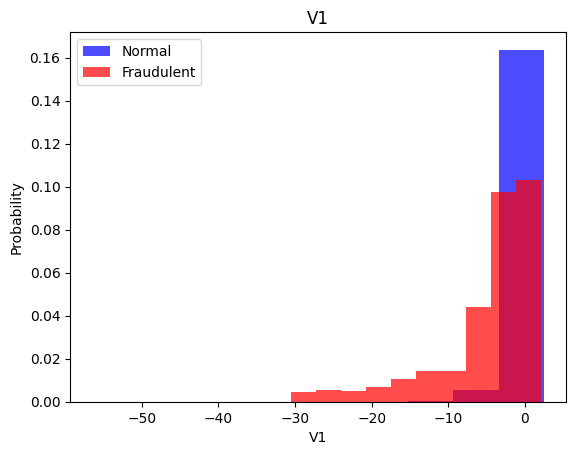

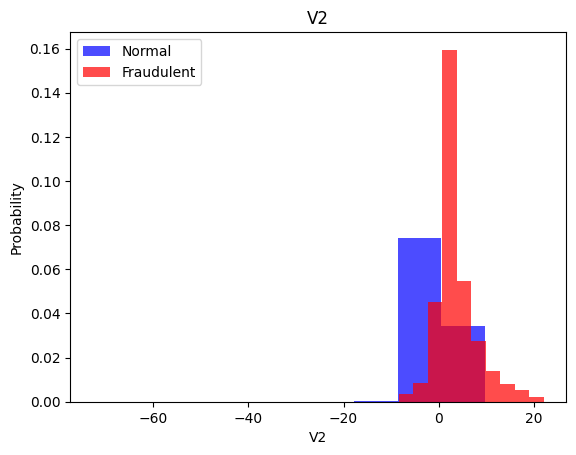

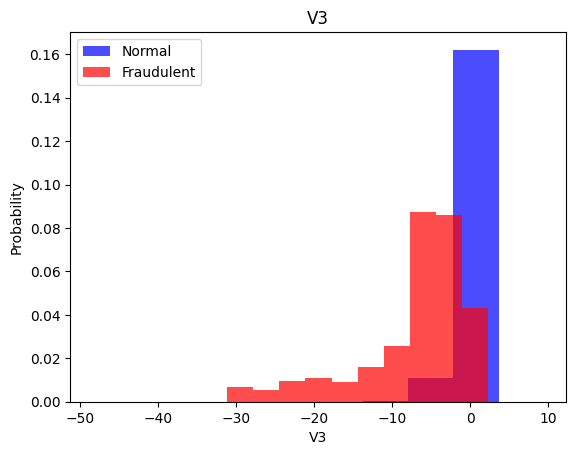

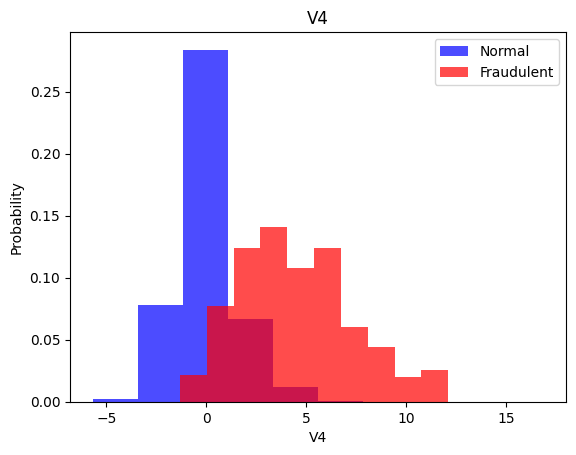

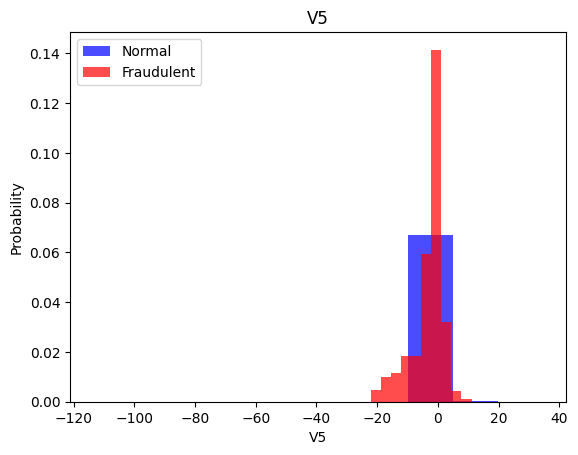

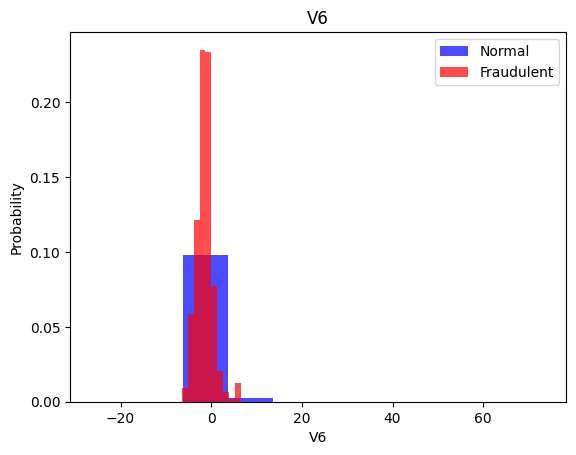

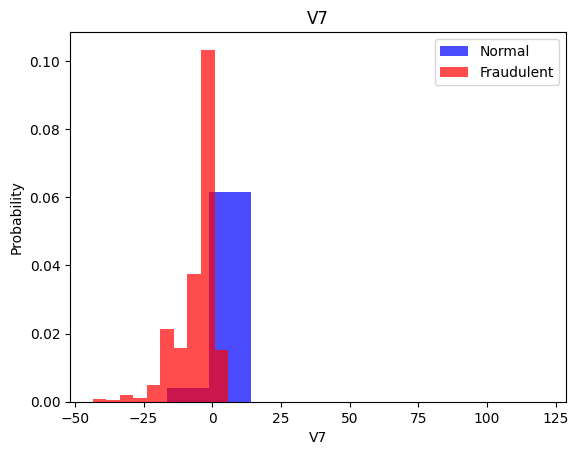

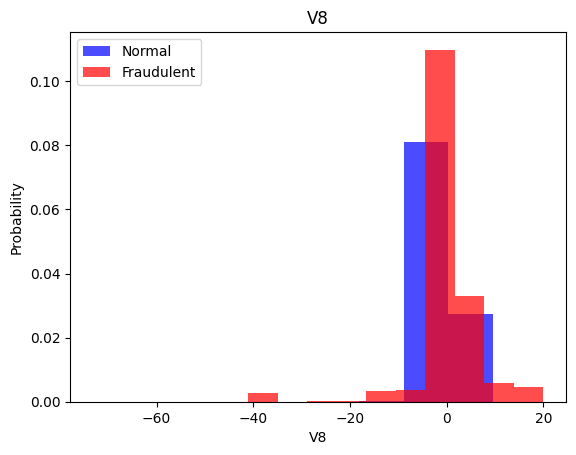

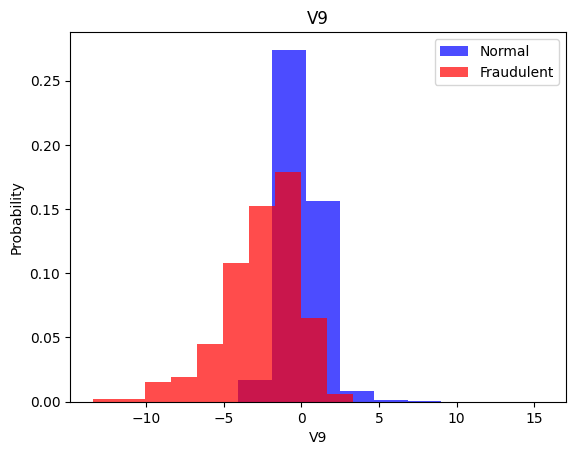

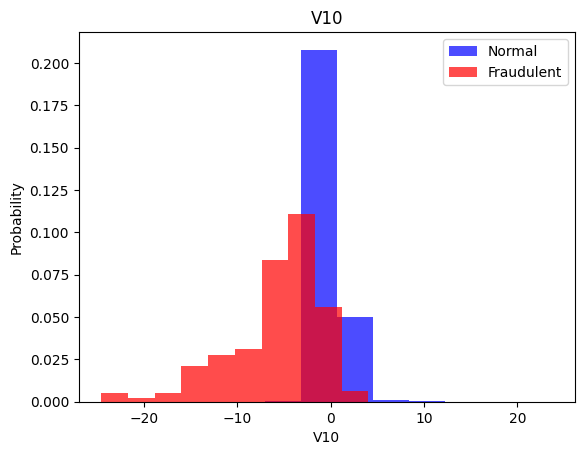

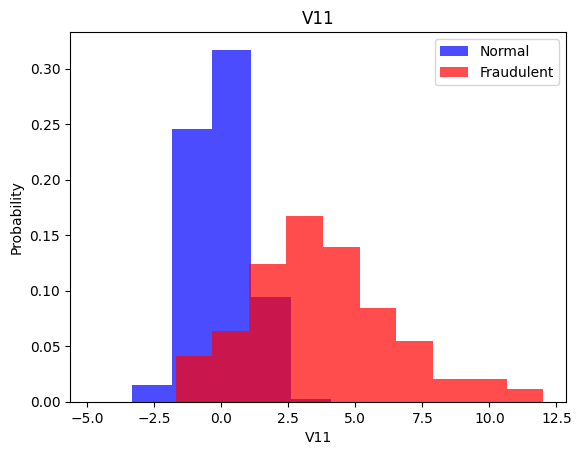

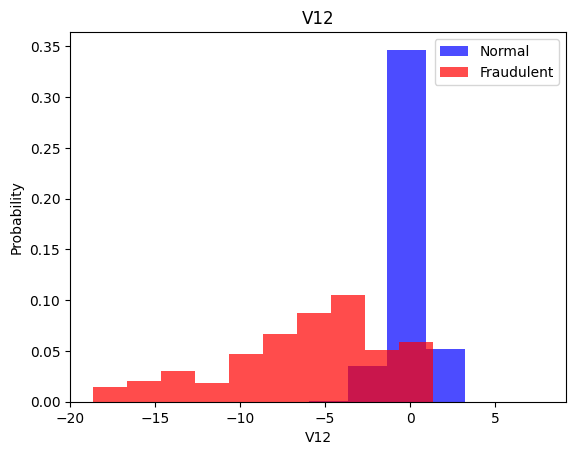

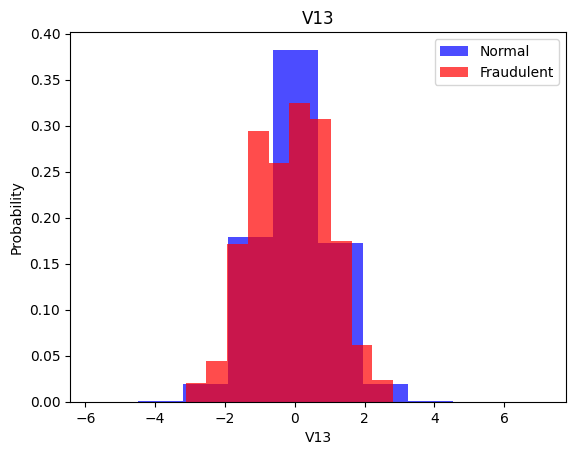

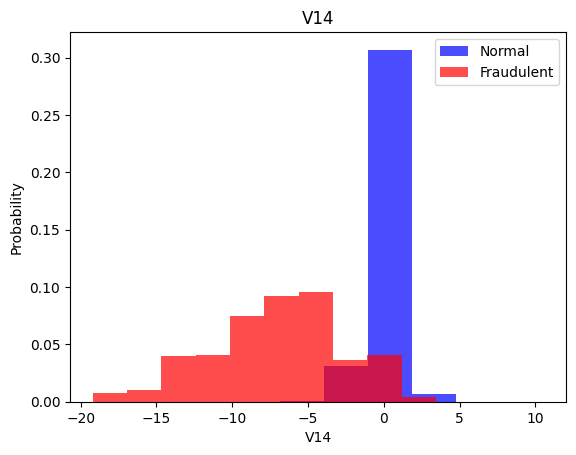

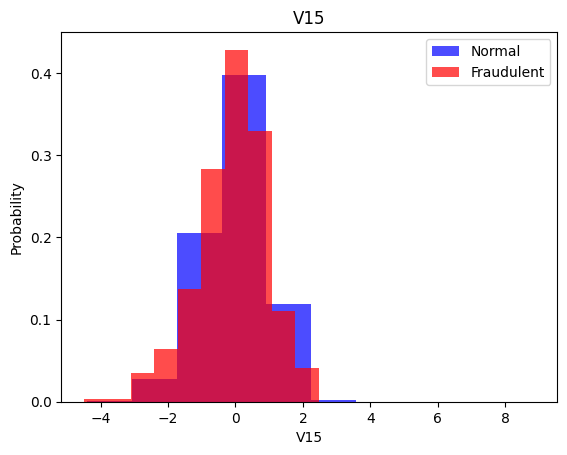

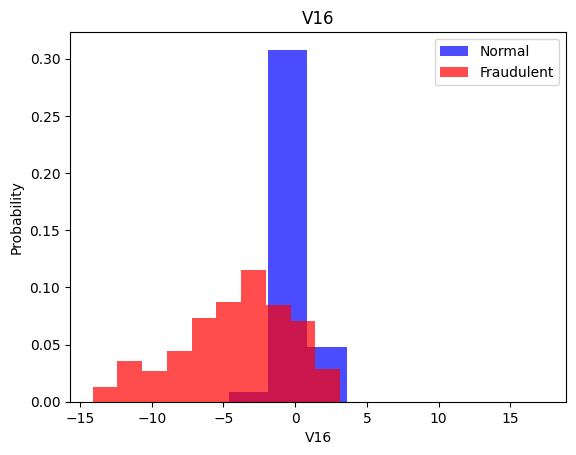

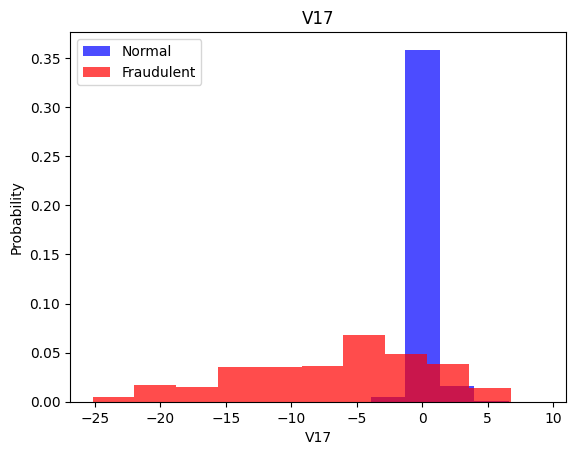

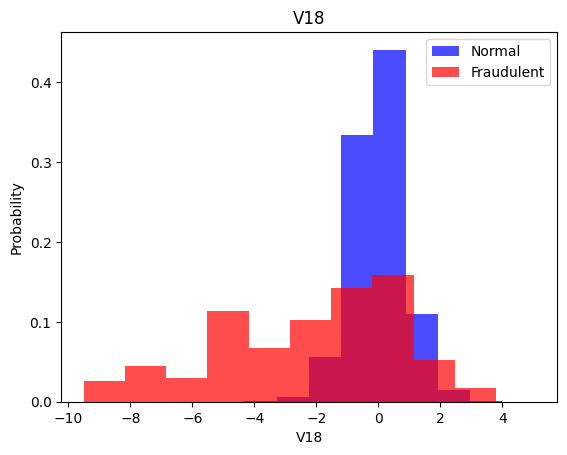

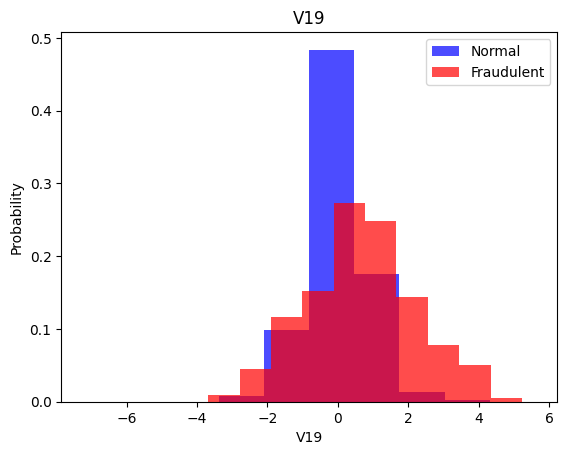

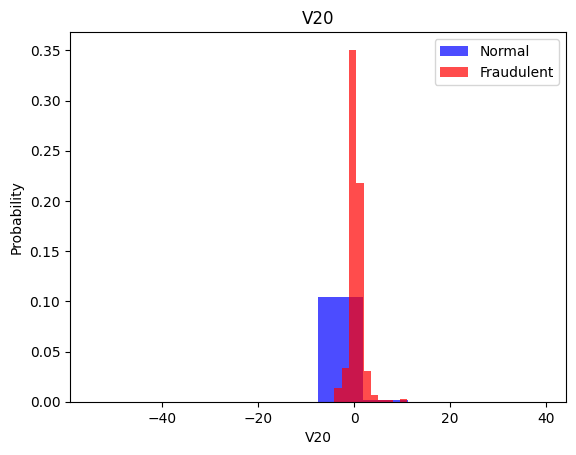

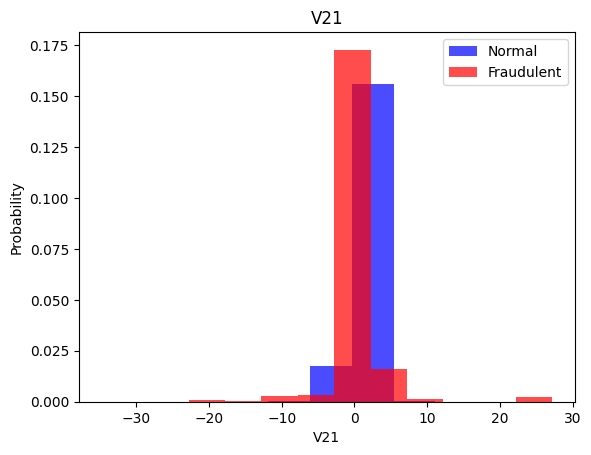

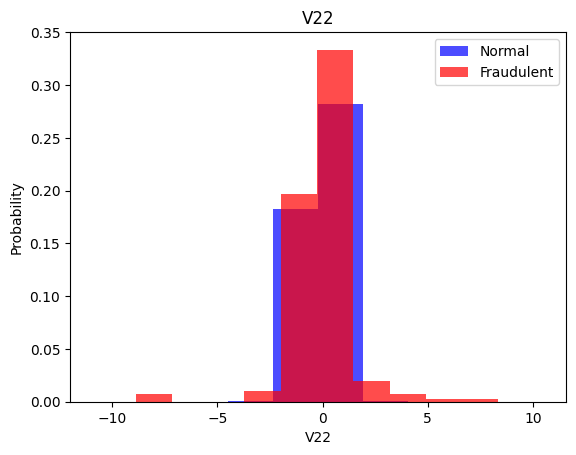

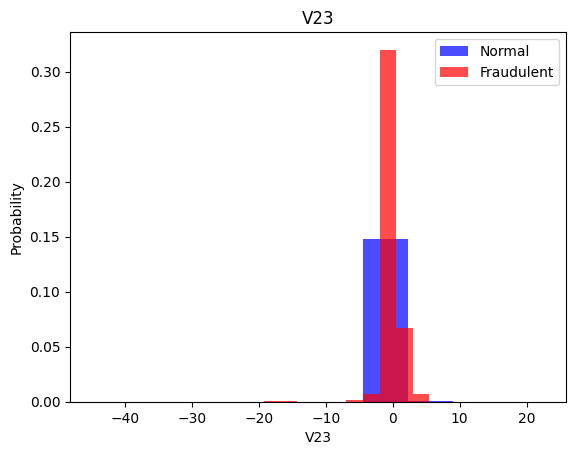

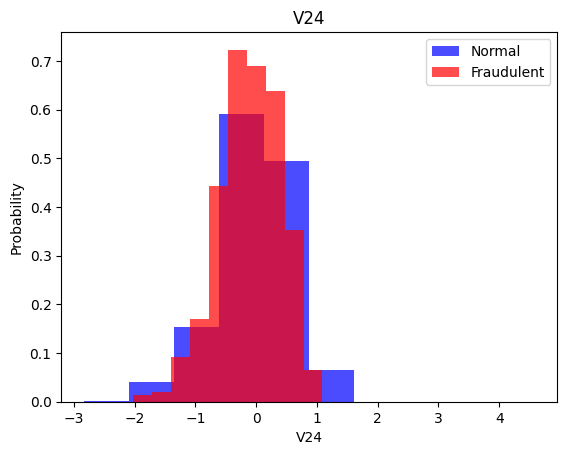

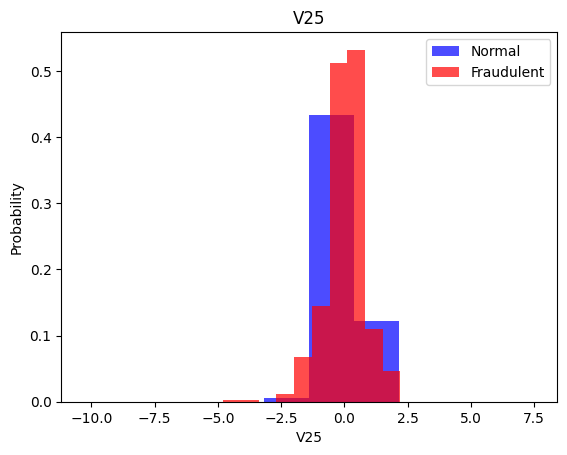

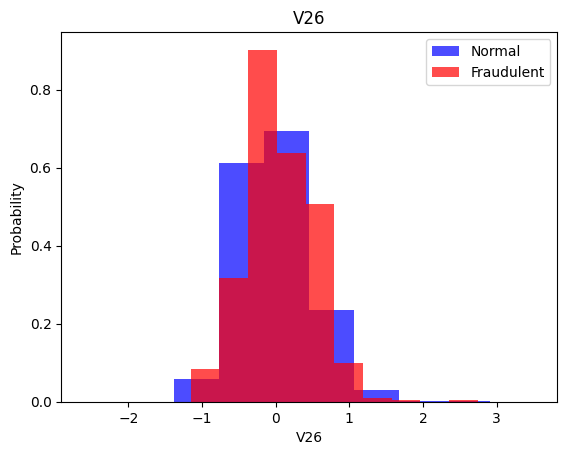

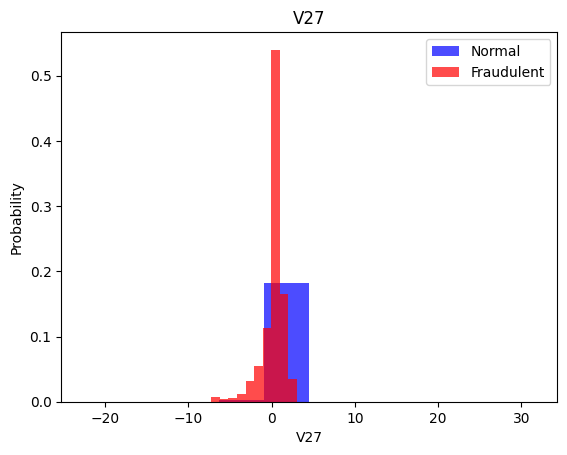

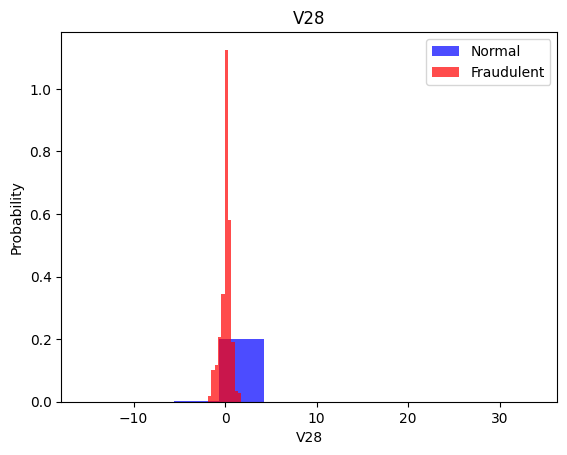

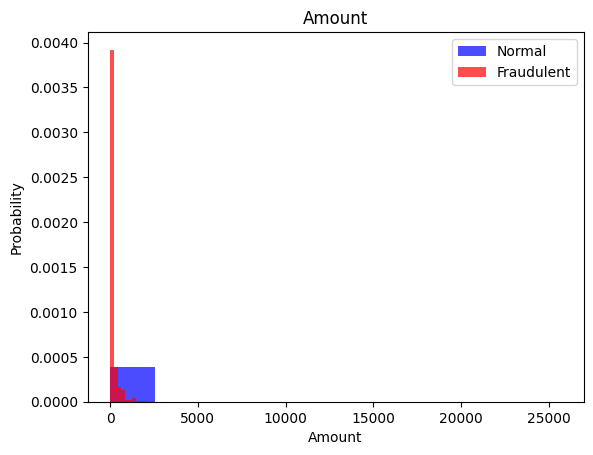

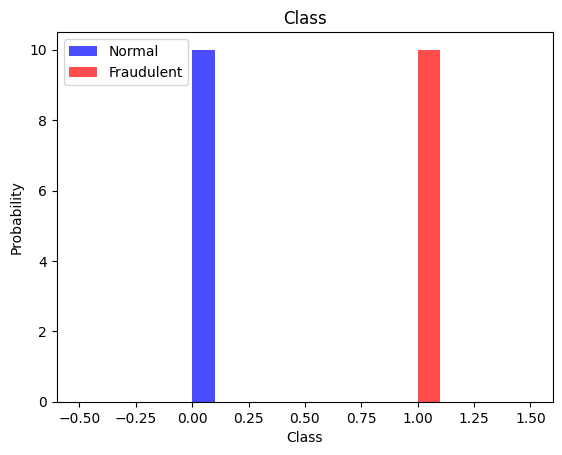

In [8]:
for cols in df[:-1]: 
    plt.hist(df[df['Class']==0][cols], color="blue", alpha=0.7, label="Normal", density=True) 
    plt.hist(df[df['Class']==1][cols], color="red", alpha=0.7, label="Fraudulent", density=True) 
    plt.title(cols)
    plt.ylabel("Probability")
    plt.xlabel(cols)
    plt.legend()
    plt.show()

# Data Split

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_temp, X_test, y_temp, y_test = train_test_split(X,y,random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
# #Oversampling for the 1 class
# ros = RandomOverSampler(random_state=123)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [11]:
print(pd.Series(y_train).value_counts())

0    159934
1       269
Name: Class, dtype: int64


# Modelling 

In [12]:
#initialize the classifier
xgb = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.01)

#fit the model on training data 
xgb.fit(X_train,y_train)

#Make predictions on validation data
y_pred_val = xgb.predict(X_val)


print("The accuracy score (Validation): ", accuracy_score(y_val,y_pred_val))
print("The classification report (Validation): \n", classification_report(y_val,y_pred_val))

#Make predicitions on test data 
y_pred_test = xgb.predict(X_test)

print("The accuracy score (Test): ", accuracy_score(y_test,y_pred_test))
print("The classification Report (Test): ", classification_report(y_test,y_pred_test))

The accuracy score (Validation):  0.9994569491779334
The classification report (Validation): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53326
           1       0.83      0.78      0.80        76

    accuracy                           1.00     53402
   macro avg       0.92      0.89      0.90     53402
weighted avg       1.00      1.00      1.00     53402

The accuracy score (Test):  0.9991432824920649
The classification Report (Test):                precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.85      0.71      0.77       147

    accuracy                           1.00     71202
   macro avg       0.92      0.86      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [13]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00203
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00691
Feature: 4, Score: 0.00394
Feature: 5, Score: 0.00191
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05126
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01485
Feature: 10, Score: 0.06003
Feature: 11, Score: 0.01379
Feature: 12, Score: 0.06074
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.03513
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.65060
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.05128
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00191
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02131
Feature: 27, Score: 0.02430
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
